## Load data

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
file_path = "../data/discussions_collab.csv"
df_comments_all = pd.read_csv(file_path)

file_path = "../data/pre_survey_anon.csv"
df_pre_all = pd.read_csv(file_path)

#file_path = "../data/post_surveys_anon.csv"
#df_post_all = pd.read_csv(file_path)

users_comments = df_comments_all['ParticipantID'].unique().astype(str)
users_pre = df_pre_all['ParticipantID'].unique().astype(str)
users = np.intersect1d(users_pre,users_comments)

print('user numbers: pre | comments | shared: ', [len(users_pre),len(users_comments),len(users)])

subreddits = df_comments_all['subreddit'].unique().astype(str)
df_pre = df_pre_all[df_pre_all['ParticipantID'].isin(users)]
df_comments = df_comments_all[df_comments_all['ParticipantID'].isin(users)]
#df_post = df_post_all[df_post_all['ParticipantID'].isin(users)]



#print(df_pre.shape,df_post.shape)


topics = df_comments_all['post_title'].unique().astype(str)

topics_survey = ['issue_attitudes_ukraine','issue_attitudes_renewable','issue_attitudes_immigration','issue_attitudes_fur','issue_attitudes_ubi','issue_attitudes_vaccine','issue_attitudes_airbnb','issue_attitudes_gaza','issue_attitudes_sexwork','issue_attitudes_socialmedia','issue_attitudes_healthcare','issue_attitudes_bodycams','issue_attitudes_minwage','issue_attitudes_guns','issue_attitudes_loan','issue_attitudes_deathpenalty','issue_attitudes_climate','issue_attitudes_vegetarian','issue_attitudes_ai','issue_attitudes_gender']

topics_survey_knowledge = ['issue_knowledge_ukraine', 'issue_knowledge_renewable', 'issue_knowledge_immigration', 'issue_knowledge_fur', 'issue_knowledge_ubi', 'issue_knowledge_vaccine', 'issue_knowledge_airbnb', 'issue_knowledge_mideast', 'issue_knowledge_sexwork', 'issue_knowledge_socialmedia', 'issue_knowledge_healthcare', 'issue_knowledge_bodycams', 'issue_knowledge_minwage', 'issue_knowledge_guns', 'issue_knowledge_loan', 'issue_knowledge_deathpenalty', 'issue_knowledge_climate', 'issue_knowledge_vegetarian', 'issue_knowledge_ai', 'issue_knowledge_gender']




user numbers: pre | comments | shared:  [788, 335, 334]


In [64]:

# Consider a specific issue discussion in a specific subreddit
tx = 9
srx = 0

print(f'Here we consider issue {topics_survey[tx]} in subreddit {subreddits[srx]}')

filtered_df_pre = df_pre[df_pre['subreddit'] == subreddits[srx]]
all_group_users = filtered_df_pre['ParticipantID'].unique().astype(str)

filtered_df_comments = df_comments[df_comments['post_title'].isin([topics[tx]])]
filtered_df_comments = filtered_df_comments[filtered_df_comments['subreddit'].isin([subreddits[srx]])]

active_group_users = filtered_df_comments['ParticipantID']



print(f'There are {len(all_group_users)} users and {len(active_group_users)} active users')

attsAll = filtered_df_pre[ topics_survey[tx] ]
attsAll = 2 * (attsAll - 1) / 5 - 1

filtered_df_pre_current = filtered_df_pre[filtered_df_pre['ParticipantID'].isin(active_group_users)]
attsAct = filtered_df_pre_current[ topics_survey[tx] ]
attsAct = 2 * (attsAct - 1) / 5 - 1

print(f'The group mean is {np.mean(attsAll)}. The active group mean {np.mean(attsAct)}')

attStrengthAll = abs(attsAll)
attStrengthAct = abs(attsAct)

print(f'The group mean is {np.mean(attStrengthAll)}. The active group mean {np.mean(attStrengthAct)}')


Here we consider issue issue_attitudes_socialmedia in subreddit DiscussPolitics1
There are 49 users and 50 active users
The group mean is -0.06122448979591835. The active group mean -0.136
The group mean is 0.5673469387755102. The active group mean 0.6000000000000001


<BarContainer object of 6 artists>

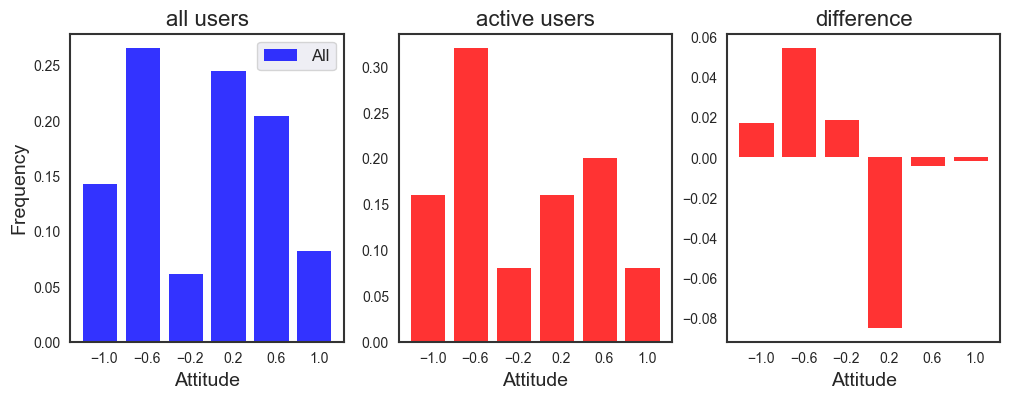

In [65]:
data = {
    "Column1": attsAll,
    "Column2": attsAct,
}
df = pd.DataFrame(data)

# Compute histogram values for both columns
#bins = np.linspace(-1, 1, 7)
bins = np.array([-1.2, -0.8, -0.4, 0, 0.4, 0.8, 1.2])
hist1, bin_edges = np.histogram(df["Column1"], bins=bins)
hist2, _ = np.histogram(df["Column2"], bins=bins)
hist1 = hist1/hist1.sum()
hist2 = hist2/hist2.sum()

# Define bar width and positions
bar_width = 0.8 * (bin_edges[1] - bin_edges[0])  # Set bar width as a fraction of bin width
bar_positions = bin_edges[:-1] + (bar_width / 2)  # Adjust bar positions

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=False, facecolor="white")
for ax in axes:
    ax.set_facecolor("white")  # White background for each subplot
    #ax.grid(axis="both", linestyle="-", alpha=0.7, color="gray")
    ax.set_xlabel("Attitude", fontsize=14)
    ax.set_xticks(bins-0.2)
    for spine in ax.spines.values():
        spine.set_visible(True)  # Ensure all spines are visible
        spine.set_edgecolor([0.2,0.2,0.2])  # Set the frame color
        spine.set_linewidth(1.5)  # Adjust the frame thickness

edge_width=0.0
bar_alpha = 0.8
axes[0].bar(bar_positions, hist1, width=bar_width, label="All", color="blue",alpha = bar_alpha, edgecolor="white",linewidth=edge_width)

# Add titles and labels
axes[0].set_title("all users", fontsize=16)
#axes[0].set_xlabel("Attitude", fontsize=14)
axes[0].set_ylabel("Frequency", fontsize=14)
axes[0].legend(fontsize=12)


axes[1].set_title("active users", fontsize=16)
axes[1].bar(bar_positions, hist2, width=bar_width, label="All", color="red",alpha = bar_alpha, edgecolor="white",linewidth=edge_width)

axes[2].set_title("difference", fontsize=16)
axes[2].bar(bar_positions, hist2-hist1, width=bar_width, label="All", color="red",alpha = bar_alpha, edgecolor="white",linewidth=edge_width)



In [66]:
GOall = np.zeros( (len(topics), len(subreddits)) )
GOact = np.zeros( (len(topics), len(subreddits)) )
GOcom = np.zeros( (len(topics), len(subreddits)) )

GOallStrength = np.zeros( (len(topics), len(subreddits)) )
GOactStrength = np.zeros( (len(topics), len(subreddits)) )
GOcomStrength = np.zeros( (len(topics), len(subreddits)) )

for tx,topic in enumerate(topics):
    for srx,subreddit in enumerate(subreddits):
        filtered_df_pre = df_pre[df_pre['subreddit'] == subreddits[srx]]
        all_group_users = filtered_df_pre['ParticipantID'].unique().astype(str)
        
        filtered_df_comments = df_comments[df_comments['post_title'].isin([topics[tx]])]
        filtered_df_comments = filtered_df_comments[filtered_df_comments['subreddit'].isin([subreddits[srx]])]
        active_group_users = filtered_df_comments['ParticipantID']
        
        attsAll = filtered_df_pre[ topics_survey[tx] ]
        attsAll = 2 * (attsAll - 1) / 5 - 1

        filtered_df_pre_current = filtered_df_pre[filtered_df_pre['ParticipantID'].isin(active_group_users)]
        attsAct = filtered_df_pre_current[ topics_survey[tx] ]
        attsAct = 2 * (attsAct - 1) / 5 - 1

        attsCom = pd.concat([
            filtered_df_pre_current.loc[filtered_df_pre_current['ParticipantID'] == user, topics_survey[tx]]
            for user in active_group_users
        ], ignore_index=True)
        attsCom = 2 * (attsCom - 1) / 5 - 1
        

        #print(f'The group mean is {np.mean(attsAll)}. The active group mean {np.mean(attsAct)}')
        GOall[tx,srx] = np.mean(attsAll)
        GOact[tx,srx] = np.mean(attsAct)
        GOcom[tx,srx] = attsCom.mean()

        attStrengthAll = abs(attsAll)
        attStrengthAct = abs(attsAct)
        attStrengthCom = abs(attsCom)

        # attStrengthAll = attsAll*attsAll
        # attStrengthAct = attsAct*attsAct
        # attStrengthCom = attsCom*attsCom

        GOallStrength[tx,srx] = np.mean(attStrengthAll)
        GOactStrength[tx,srx] = np.mean(attStrengthAct)
        GOcomStrength[tx,srx] = np.mean(attStrengthCom)
        
        
        
print(GOall.shape)

(20, 6)


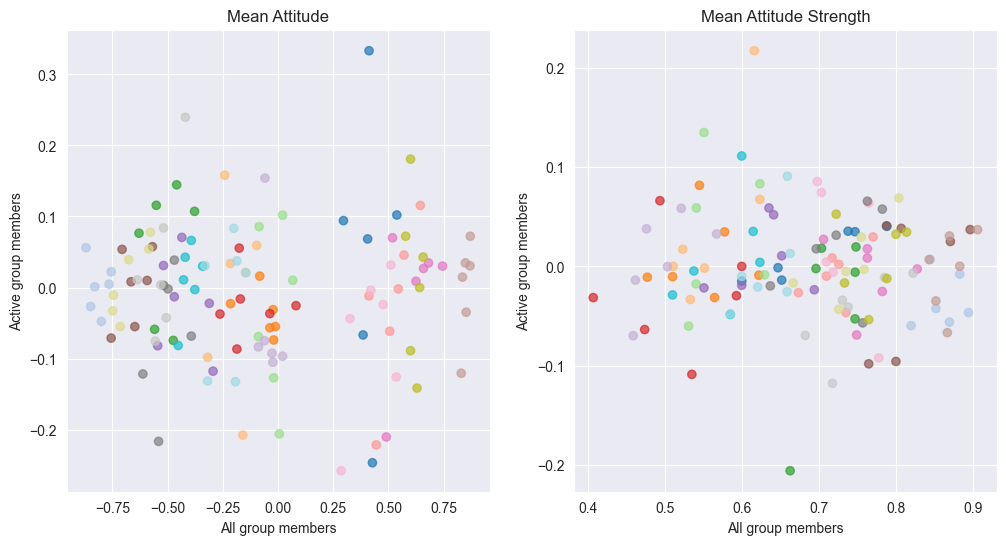

In [67]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False, facecolor="white")

x_values = GOall.flatten()
y_values = GOact.flatten()
#y_values = GOcom.flatten()

# Create row indices for color mapping (repeat each row index 6 times)
col_indices = np.repeat(np.arange(20), 6)
#col_indices = np.tile(np.arange(6), 20)

# Scatter plot
axes[0].scatter(x_values, y_values-x_values,c=col_indices, cmap='tab20', alpha=0.7)
axes[0].set_xlabel("All group members")
axes[0].set_ylabel("Active group members")
axes[0].set_title("Mean Attitude")

# Add x = y line
min_val = min(x_values.min(), y_values.min())  # Get min value for axis limits
max_val = max(x_values.max(), y_values.max())  # Get max value for axis limits
#axes[0].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="x = y")


x_values = GOallStrength.flatten()
y_values = GOactStrength.flatten()
#y_values = GOcomStrength.flatten()

col_indices = np.repeat(np.arange(20), 6)
#col_indices = np.tile(np.arange(6), 20)

# Scatter plot
axes[1].scatter(x_values, y_values-x_values,c=col_indices, cmap='tab20', alpha=0.7)
axes[1].set_xlabel("All group members")
axes[1].set_ylabel("Active group members")
axes[1].set_title("Mean Attitude Strength")

# Add x = y line
min_val = min(x_values.min(), y_values.min())  # Get min value for axis limits
max_val = max(x_values.max(), y_values.max())  # Get max value for axis limits
#axes[1].plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="x = y")

fig.savefig("../private/figs/scatter.pdf", format="pdf",facecolor="white")
fig.savefig("../private/figs/scatter.png", format="png",facecolor="white")

plt.show()


# Let's look at the attitude transition matrix (ATM)

In [ ]:
filtered_df_pre = df_pre
#filtered_df_pre = df_pre[df_pre['subreddit'] == subreddits[srx]]
all_pre_users = filtered_df_pre['ParticipantID'].unique().astype(str)








In [ ]:
Obs = np.zeros( (len(users) * len(topics), 5) )  # Initialize the Obs array
Obs_data = []
print(df_pre_atts.shape,df_post_atts_clean.shape,Obs.shape)
print(len(users) , len(topics))

print(subreddits)

for ux,user in enumerate(users):
    ux_post = df_post_atts_clean[ df_post_atts_clean['ParticipantID'] == user ].values
    ux_pre = df_pre_atts[ df_pre_atts['ParticipantID'] == user ].values

    #srx = df_pre_atts.loc[ df_pre_atts['ParticipantID'] == user , 'subreddit' ]
    subreddit = df_pre_atts.loc[df_pre_atts['ParticipantID'] == user, 'subreddit'].iloc[0]
    #print(type(subreddits))
    srx = np.where(subreddits == subreddit)[0][0]
    #srx = subreddits.index(subreddit)

    #print(srx)

    for tx,topic in enumerate(topics_survey):
        ix = tx + ux * len(topics)  # Compute the linear index
        #print(ux_pre[0,tx])
        Obs[ix,0] = (ux_pre[0,tx] -1 )/2.5 -1
        Obs[ix,1] = (ux_post[0,tx] -1 )/2.5 -1
        Obs[ix,2] = (GOall[tx,srx] -1 )/2.5 -1
        Obs[ix,3] = (GOact[tx,srx] -1 )/2.5 -1
        Obs[ix,4] = (GOcomments[tx,srx] -1 )/2.5 -1
        #group = 
        Obs_data.append( [subreddit , topics_survey[tx] , user])
        #print(Obs[ix])
        #print(Obs[ix],Obs_data[ix])

print(Obs_data)